In [88]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from xgboost import XGBRegressor,XGBClassifier
from sklearn.tree import DecisionTreeClassifier


In [89]:
data = pd.read_csv('data-cancer.csv')
df = pd.read_csv('data-cancer.csv')
data

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


WE ARE TRYING TO PREDICT THE DIAGNOSIS:

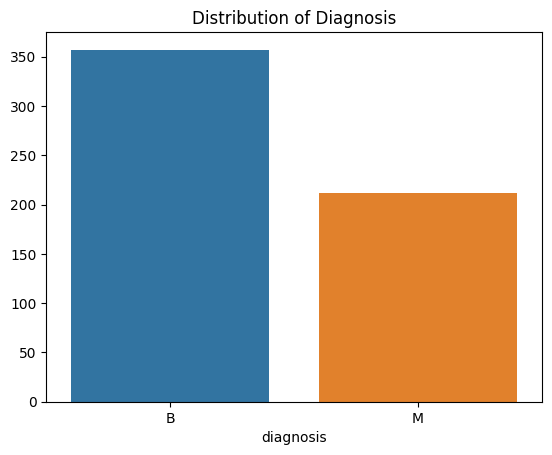

In [90]:
A = data['diagnosis'].groupby(data['diagnosis']).count()
sns.barplot(x=A.index, y= A.values , data= data)
plt.title('Distribution of Diagnosis')
plt.show()

CONVERT THE DIAGNOSIS VARIAVBLES TO 0 AND 1:

In [91]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B': 0})
del data['id']
data.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
x = data.loc[:, data.columns[1:]]
y = data['diagnosis']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [94]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [95]:
print('accuracy score = ', accuracy_score(y_test, y_pred))
print('cfn report', classification_report(y_test, y_pred))

accuracy score =  0.9035087719298246
cfn report               precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.85      0.94      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



HERE FROM THE DECISION TREE METHOD WE HAVE AN ACCURACY OF 90.4%, LETS TRY THE CROSS_VALUE_METHOD:

----------------------------------------------------------------------------------------------------------------

In [96]:
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train, y_train)
    Training_A = accuracy_score(y_train, dt.predict(x_train))
   
print('accuracy score = ', accuracy_score(y_test, y_pred))
print('cfn report', classification_report(y_test, y_pred))

accuracy score =  0.9035087719298246
cfn report               precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.85      0.94      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



OUR ACCURACY SCORE HAS SLIGHTLY INCREASED TO 91%, NOW LETS TRY THE XBO0ST METHOD:

-----------------------------------------------------------------------------------------------------------

In [97]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
y_hat = xg.predict(x_test)

In [98]:
print('accuracy score = ', accuracy_score(y_test, y_hat))
print('cfn report', classification_report(y_test, y_hat))

accuracy score =  0.9824561403508771
cfn report               precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



HERE FOR THE XGBOOST OUR ACCURACY INCREASED SIGNIFCANTLY TO 98% WHICH IS EXCELLENT, NOW LETS TRY GRIDSEARCHCV METHOD:

----------------------------------------------------------------------------------------------------------------

In [99]:
from sklearn.model_selection import GridSearchCV
grid = { 'learning_rate' :[0.1, 1, 0.01, 0.001], 'gamma' : [0, 1, 10, 100]}
model = GridSearchCV(xg, grid, cv = 10, verbose= 2)
model.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.0s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END .........................gamma=0, learning_rate=0.1; total time=   0.1s
[CV] END ...........................gamma=0, learning_rate=1; total time=   0.0s
[CV] END ...........................gamma=0, l

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 10, 100],
                         'learning_rate': [0.1, 1, 0.01, 0.001]},
             verbose=2)

In [100]:
grid_predict = model.predict(x_test)
print('accuracy score = ', accuracy_score(y_test, grid_predict))
print('cfn report', classification_report(y_test, grid_predict))

accuracy score =  0.9649122807017544
cfn report               precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



HERE THE GRIDSEARCH METHOD GAVE US ACCURACY OF 96.5%, HOWEVER XGBOOST METHOD IS STILL SUPERIOR WITH 98% ACCURACY ON PREDICTING THE DISEASE!